In [1]:
##################################################
## Credit Card Lead Prediction
##################################################
#!/usr/bin/python
__author__ = 'Midhunkumar S'
__version__ = '0.1.0'
__maintainer__ = 'Midhunkumar S'
__status__ = 'Dev'
##################################################

In [2]:
# Importing Libraries
import numpy as np                      
import pandas as pd                      
import matplotlib.pyplot as plt
import seaborn as sns
colo = sns.color_palette()
sns.set_style("darkgrid")

from scipy.stats import zscore 
from sklearn.model_selection import train_test_split
#from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

seed = np.random.seed(2020)

In [3]:
# Importing Files
train_df = pd.read_csv("../input/cred-data/train_s3TEQDk.csv", encoding="utf-8")
test_df = pd.read_csv("../input/cred-data/test_mSzZ8RL.csv", encoding="utf-8")
sample_df = pd.read_csv("../input/cred-data/sample_submission_eyYijxG.csv", encoding="utf-8")

### `EDA`

In [4]:
# Checking Shape

print ( "Train dataset shape - " ,train_df.shape,  )
print ( "Test dataset shape - " ,test_df.shape )
print ( "Sample dataset shape - " ,sample_df.shape )

Train dataset shape -  (245725, 11)
Test dataset shape -  (105312, 10)
Sample dataset shape -  (105312, 2)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [7]:
train_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
test_df.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [9]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [10]:
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [11]:
# % of Null columns 
round((train_df.isnull().sum()/len(train_df))*100,2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64

`We could see 11.93% of Credit_Product has missing values`

In [12]:
round((test_df.isnull().sum()/len(test_df))*100,2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.89
Avg_Account_Balance     0.00
Is_Active               0.00
dtype: float64

`We could see 11.89% of Credit_Product has missing values same as Train file`

In [13]:
# Checking the unique Values
train_col = train_df.columns
print("\nTrain Coloumns:\n",train_col)
test_col = test_df.columns
print("\nTest Coloumns:\n",test_col)


Train Coloumns:
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

Test Coloumns:
 Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')


In [14]:
print("Train File\n")
for i in train_col:
    print(f"Unique Coloumn values in Train {i} is -  {len(train_df[i].unique())}")
    
print("\nTest File\n")
for i in test_col:
    print(f"Unique Coloumn values in Test {i} is -  {len(test_df[i].unique())}")
         

Train File

Unique Coloumn values in Train ID is -  245725
Unique Coloumn values in Train Gender is -  2
Unique Coloumn values in Train Age is -  63
Unique Coloumn values in Train Region_Code is -  35
Unique Coloumn values in Train Occupation is -  4
Unique Coloumn values in Train Channel_Code is -  4
Unique Coloumn values in Train Vintage is -  66
Unique Coloumn values in Train Credit_Product is -  3
Unique Coloumn values in Train Avg_Account_Balance is -  135292
Unique Coloumn values in Train Is_Active is -  2
Unique Coloumn values in Train Is_Lead is -  2

Test File

Unique Coloumn values in Test ID is -  105312
Unique Coloumn values in Test Gender is -  2
Unique Coloumn values in Test Age is -  62
Unique Coloumn values in Test Region_Code is -  35
Unique Coloumn values in Test Occupation is -  4
Unique Coloumn values in Test Channel_Code is -  4
Unique Coloumn values in Test Vintage is -  66
Unique Coloumn values in Test Credit_Product is -  3
Unique Coloumn values in Test Avg_Acco

In [15]:
print("Train File\n")
for i in ['Gender' , 'Region_Code' ,'Occupation' , 'Channel_Code', 'Credit_Product','Is_Active']:
    print(f"\nColumn {i} unique values {train_df[i].unique()}")
    
print("\nTest File\n")
for i in ['Gender' , 'Region_Code' ,'Occupation' , 'Channel_Code', 'Credit_Product','Is_Active']:
    print(f"\nColumn {i} unique values {test_df[i].unique()}")


Train File


Column Gender unique values ['Female' 'Male']

Column Region_Code unique values ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']

Column Occupation unique values ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']

Column Channel_Code unique values ['X3' 'X1' 'X2' 'X4']

Column Credit_Product unique values ['No' nan 'Yes']

Column Is_Active unique values ['No' 'Yes']

Test File


Column Gender unique values ['Male' 'Female']

Column Region_Code unique values ['RG254' 'RG268' 'RG270' 'RG272' 'RG253' 'RG257' 'RG284' 'RG283' 'RG277'
 'RG273' 'RG261' 'RG280' 'RG274' 'RG278' 'RG269' 'RG281' 'RG251' 'RG252'
 'RG279' 'RG282' 'RG262' 'RG263' 'RG264' 'RG256' 'RG265' 'RG260' 'RG258'
 'RG271' 'RG250' 'RG275' 'RG276' 'RG267' 'RG255' 'RG259' 'RG266']

Co

In [16]:
# Now Lets find out age minimum and Maximum values
print(min(train_df["Age"]), max(train_df["Age"]))
print(min(test_df["Age"]), max(test_df["Age"]))

23 85
24 85


#### `From above results, we can see below insights about the data`
1. We have Five categorical values  - ['Gender' , 'Region_Code' ,'Occupation' , 'Channel_Code', 'Credit_Product','Is_Active']
2. Credit_Product has NaN values, It could be due to they don't have the product. so, we can replce with no in NnN values
3. Region_Code has 35 unique values, Its a lot 
4. Also, while checking Age, Min = 23, and Max = 85. I would suggest that we can categorize this for efficient prediction


<AxesSubplot:>

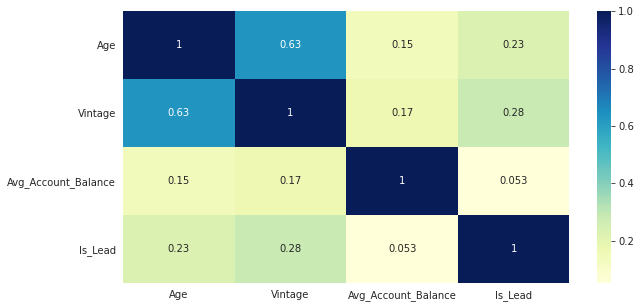

In [17]:
# Correaltion Chart
plt.figure(figsize = (10,5)) 
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

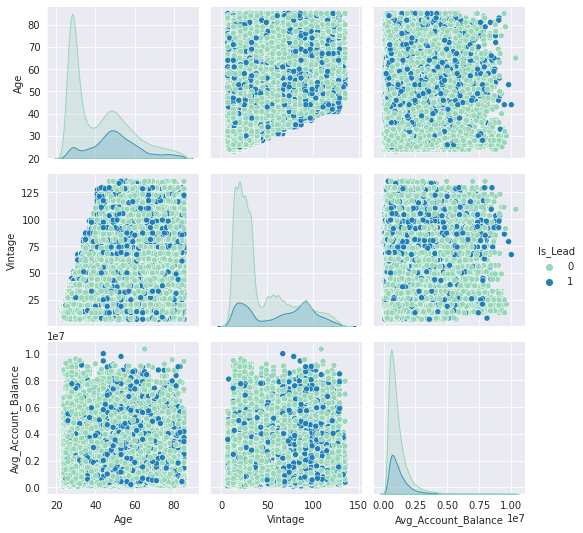

In [18]:
# PairPlot
sns.pairplot(train_df, hue = "Is_Lead",palette = "YlGnBu")

<AxesSubplot:xlabel='Credit_Product', ylabel='Is_Lead'>

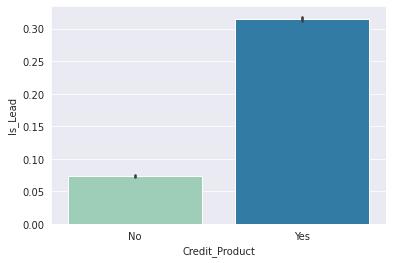

In [19]:
# Barplot for Credit_Product and Is_lead
sns.barplot(x = train_df.Credit_Product, y = train_df.Is_Lead, data = train_df, palette="YlGnBu")

<AxesSubplot:xlabel='Gender', ylabel='Is_Lead'>

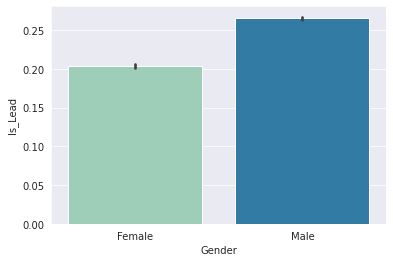

In [20]:
# Barplot for Gender and Is_lead
sns.barplot(x = train_df.Gender, y = train_df.Is_Lead, data = train_df, palette = "YlGnBu")

<AxesSubplot:xlabel='Region_Code', ylabel='Is_Lead'>

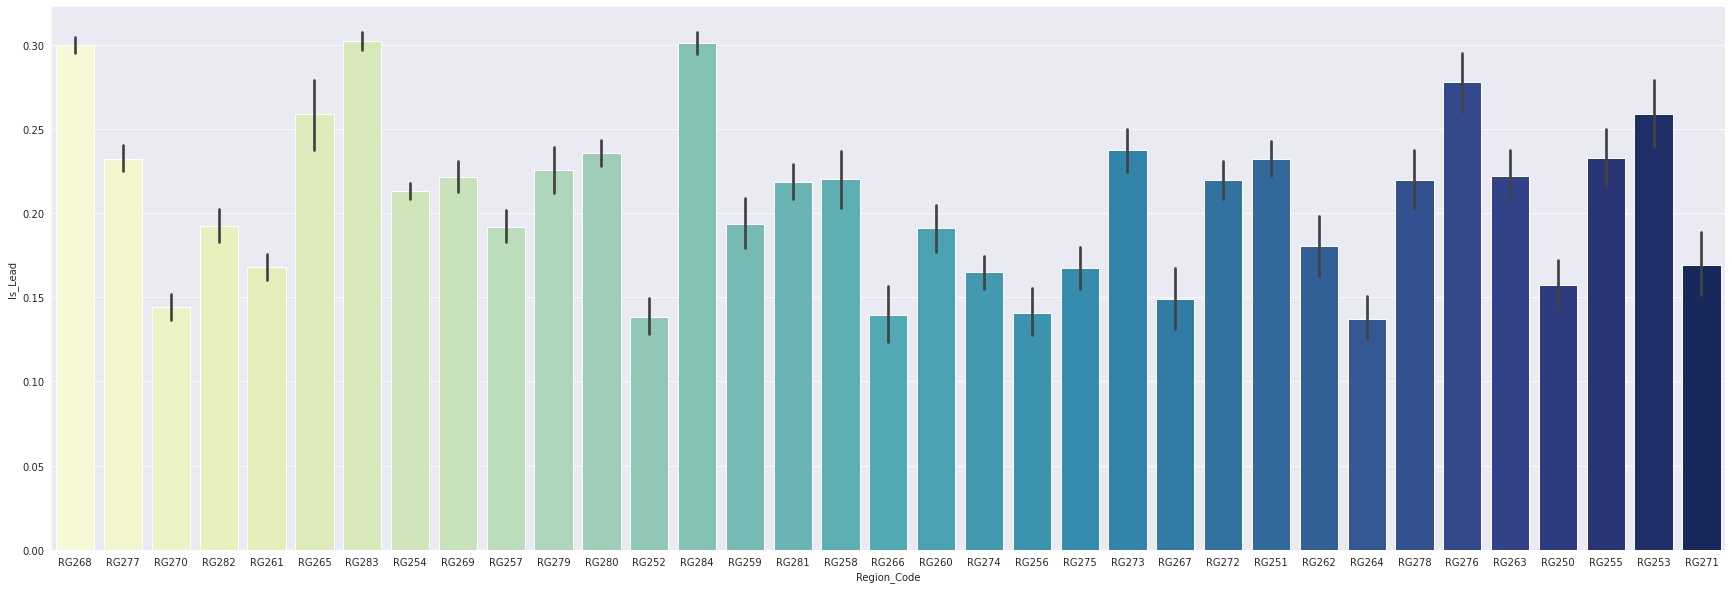

In [21]:
# Barplot for Region_Code and Is_lead
plt.figure(figsize = (30,10))
sns.barplot(x = train_df.Region_Code, y = train_df.Is_Lead, data = train_df, palette = "YlGnBu")

<AxesSubplot:xlabel='Occupation', ylabel='Is_Lead'>

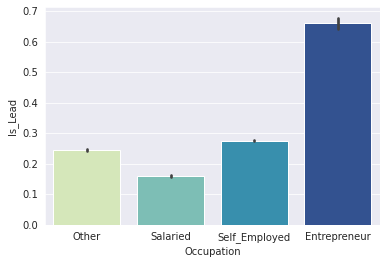

In [22]:
# Barplot for Occupation and Is_lead
sns.barplot(x = train_df.Occupation,y = train_df.Is_Lead,data = train_df,palette = "YlGnBu")

<AxesSubplot:xlabel='Channel_Code', ylabel='Is_Lead'>

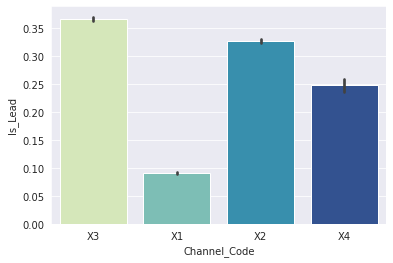

In [23]:
# Barplot for Channel_Code and Is_lead
sns.barplot(x = train_df.Channel_Code,y = train_df.Is_Lead,data = train_df,palette = "YlGnBu")

<AxesSubplot:xlabel='Is_Active', ylabel='Is_Lead'>

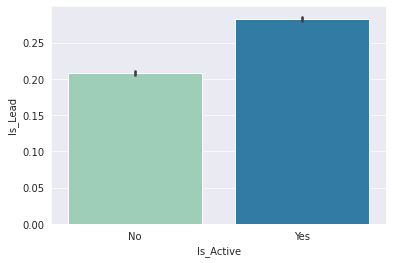

In [24]:
# Barplot for Is_Active and Is_lead
sns.barplot(x = train_df.Is_Active, y = train_df.Is_Lead, data = train_df,palette = "YlGnBu")

<AxesSubplot:xlabel='Avg_Account_Balance'>

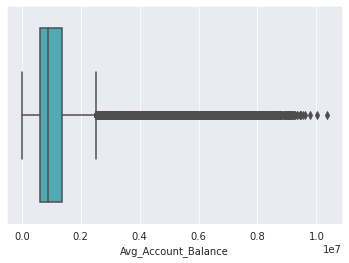

In [25]:
# Lets check if any outliers
sns.boxplot(x=train_df['Avg_Account_Balance'], palette="YlGnBu")

In [26]:
train_df.Avg_Account_Balance.describe()

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

<AxesSubplot:xlabel='Age'>

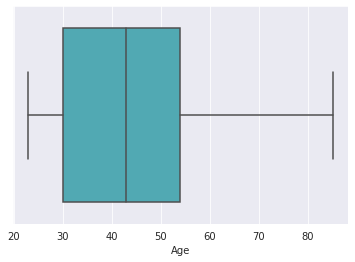

In [27]:
sns.boxplot(x=train_df['Age'],palette="YlGnBu")

<AxesSubplot:xlabel='Vintage'>

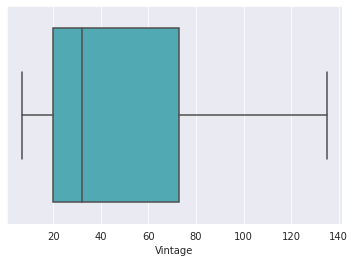

In [28]:
sns.boxplot(x=train_df['Vintage'],palette="YlGnBu")

#### From the above plots we can easily see outliers are present 

### ` Data Cleaning and Imputation for missing values, outliers and categorical values. `

In [29]:
# Handling Missing Values
new_train = train_df
new_test = test_df

new_train["Credit_Product"] = new_train["Credit_Product"].replace(np.nan,"Unknown")
new_test["Credit_Product"] = new_test["Credit_Product"].replace(np.nan,"Unknown")

In [30]:
# % of Null columns 
round((train_df.isnull().sum() / len(train_df)) * 100,2)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

In [31]:
round((new_test.isnull().sum() / len(new_test)) * 100,2)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
dtype: float64

In [32]:
# Removing outliers
new_train['Z_Score'] = zscore(new_train['Avg_Account_Balance'])


In [33]:
new_train = new_train.loc[new_train['Z_Score'].abs() < 1]


<AxesSubplot:xlabel='Avg_Account_Balance'>

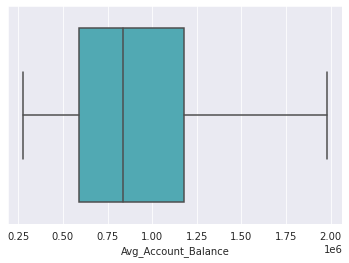

In [34]:
# Lets check if any outliers
sns.boxplot(x=new_train['Avg_Account_Balance'], palette="YlGnBu")

In [35]:
new_train.pop("Z_Score")

0        -0.096968
1        -0.640630
2         0.417279
3        -0.771395
4        -0.283276
            ...   
245720    0.934635
245721   -0.311221
245722   -0.536670
245723   -0.845199
245724    0.001023
Name: Z_Score, Length: 214330, dtype: float64

In [36]:
# Checking Shape
print ( "Train dataset shape - " , new_train.shape)
print ( "Test dataset shape - " , new_test.shape )

Train dataset shape -  (214330, 11)
Test dataset shape -  (105312, 10)


In [37]:
# Tried imputing numeric -> catogries But, Degraded the performance 
"""def age_cat(age):
    if age <40:
        return "Age_Below_40_year"
    elif age > 40 and age < 60:
        return "Age_40_To_60_year"
    else:
        return "Age_Above_60_year"
        
def vint_cat(vintage):
    if vintage <40:
        return "Vintage_Below_40_months"
    elif vintage > 40 and vintage < 60:
        return "Vintage_40_To_60_months"
    else:
        return "Vintage_Above_60_months"""
    

'def age_cat(age):\n    if age <40:\n        return "Age_Below_40_year"\n    elif age > 40 and age < 60:\n        return "Age_40_To_60_year"\n    else:\n        return "Age_Above_60_year"\n        \ndef vint_cat(vintage):\n    if vintage <40:\n        return "Vintage_Below_40_months"\n    elif vintage > 40 and vintage < 60:\n        return "Vintage_40_To_60_months"\n    else:\n        return "Vintage_Above_60_months'

In [38]:
# Imputing Age 
#new_train["Age"] = new_train["Age"].map(lambda x: age_cat(x))
#new_test["Age"] = new_test["Age"].map(lambda x: age_cat(x))

# Imputing Vintage
#new_train["Vintage"] = new_train["Vintage"].map(lambda x: vint_cat(x))
#new_test["Vintage"] = new_test["Vintage"].map(lambda x: vint_cat(x))

In [39]:
# Checking Shape
print ( "Train dataset shape - " , new_train.shape )
print ( "Test dataset shape - " , new_test.shape )

Train dataset shape -  (214330, 11)
Test dataset shape -  (105312, 10)


In [40]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214330 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   214330 non-null  object
 1   Gender               214330 non-null  object
 2   Age                  214330 non-null  int64 
 3   Region_Code          214330 non-null  object
 4   Occupation           214330 non-null  object
 5   Channel_Code         214330 non-null  object
 6   Vintage              214330 non-null  int64 
 7   Credit_Product       214330 non-null  object
 8   Avg_Account_Balance  214330 non-null  int64 
 9   Is_Active            214330 non-null  object
 10  Is_Lead              214330 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 19.6+ MB


In [41]:
# Removing ID from Datframe
train_ID = new_train.pop("ID")
test_ID = new_test.pop("ID")
new_train.pop("Region_Code")
new_test.pop("Region_Code")

0         RG254
1         RG268
2         RG270
3         RG272
4         RG270
          ...  
105307    RG268
105308    RG277
105309    RG254
105310    RG254
105311    RG256
Name: Region_Code, Length: 105312, dtype: object

In [42]:
# now let's work on the categorical variables 
cat_variable = list(new_train.dtypes[new_train.dtypes == 'object'].index)
print(cat_variable)

['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']


In [43]:
# Assigning Dummies to cat_variable

#final_train = pd.get_dummies(new_train, columns=cat_variable,drop_first=True)
#final_test = pd.get_dummies(new_test, columns=cat_variable,drop_first=True)

# Lable encoder
from sklearn.preprocessing import LabelEncoder

Lab_enode = LabelEncoder()

for i in cat_variable:
    
    new_train[i] = Lab_enode.fit_transform(new_train[i])
    new_test[i] = Lab_enode.fit_transform(new_test[i])

In [44]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214330 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Gender               214330 non-null  int64
 1   Age                  214330 non-null  int64
 2   Occupation           214330 non-null  int64
 3   Channel_Code         214330 non-null  int64
 4   Vintage              214330 non-null  int64
 5   Credit_Product       214330 non-null  int64
 6   Avg_Account_Balance  214330 non-null  int64
 7   Is_Active            214330 non-null  int64
 8   Is_Lead              214330 non-null  int64
dtypes: int64(9)
memory usage: 16.4 MB


In [45]:


final_train = new_train
final_test = new_test

In [46]:
# Checking Shape
print ( "Train dataset shape - " , final_train.shape )
print ( "Test dataset shape - " , final_test.shape )



Train dataset shape -  (214330, 9)
Test dataset shape -  (105312, 8)


In [47]:
X = final_train.loc[:, final_train.columns !='Is_Lead' ]
y = final_train.loc[:, final_train.columns == 'Is_Lead']
test = final_test.loc[:,final_test.columns]


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Gender               105312 non-null  int64
 1   Age                  105312 non-null  int64
 2   Occupation           105312 non-null  int64
 3   Channel_Code         105312 non-null  int64
 4   Vintage              105312 non-null  int64
 5   Credit_Product       105312 non-null  int64
 6   Avg_Account_Balance  105312 non-null  int64
 7   Is_Active            105312 non-null  int64
dtypes: int64(8)
memory usage: 6.4 MB


### ` Modeling`

In [49]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [50]:
# split and stratify
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = seed,stratify=y )

In [51]:
print(y_train.value_counts()/ len(y_train))
print(y_test.value_counts()/ len(y_test))


Is_Lead
0          0.766075
1          0.233925
dtype: float64
Is_Lead
0          0.766077
1          0.233923
dtype: float64


In [52]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
roc_auc_score(y, dtree.predict_proba(X)[:, 1])

0.9132090150238898

In [54]:


y_pred = dtree.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
confusion_metrics(cm)

[[42271  6987]
 [ 6569  8472]]
True Positives: 8472
True Negatives: 42271
False Positives: 6987
False Negatives: 6569
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.56
Specificity: 0.86
Precision: 0.86
f_1 Score: 0.68


In [55]:
y_pred = dtree.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7107077210094053

In [56]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
roc_auc_score(y, RF.predict_proba(X)[:, 1])


0.9660212782945263

In [58]:
y_pred = RF.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7526788573613867

In [59]:
y_pred = RF.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
confusion_metrics(cm)

True Positives: 8726
True Negatives: 45574
False Positives: 3684
False Negatives: 6315
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.58
Specificity: 0.93
Precision: 0.93
f_1 Score: 0.71


In [60]:
# GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [61]:
print(roc_auc_score(y, GBC.predict_proba(X)[:, 1]))

y_pred = GBC.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.8731484345926821
0.7531502805131914


In [62]:
# Trying CatBoost
from catboost import CatBoostClassifier

CBC = CatBoostClassifier(verbose=0)
CBC.fit(X_train,y_train)

In [63]:
print(roc_auc_score(y, CBC.predict_proba(X)[:, 1]))

y_pred = CBC.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.8853051015726219
0.7563503835655251


In [64]:
from xgboost import XGBClassifier
XGBC = XGBClassifier(verbose=0)
XGBC.fit(X_train,y_train)


[16:30:22] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:30:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=0,
              verbosity=None)

In [65]:
print(roc_auc_score(y, XGBC.predict_proba(X)[:, 1]))

y_pred = XGBC.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.8883550293502437
0.7560194935013649


In [66]:
#Now let us use Kfold 


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
result = cross_val_score(CBC,X,y,cv=kfold)
result

array([0.86026221, 0.86042551, 0.86096207, 0.85937573, 0.86404143])